<a href="https://colab.research.google.com/github/divyeeee/ML_projects-/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np


In [ ]:
transform = transforms.ToTensor() # used to transform the images into tensor

# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,),(0.5,))
# ])

mnist_data = datasets.MNIST(root='./data',train=True, download=True,transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data,
                                          batch_size=64,
                                          shuffle=True)


In [ ]:
dataiter = iter(data_loader)
images,labels  = dataiter.__next__()

print(torch.min(images), torch.max(images)) # so we see that the values really range from 0 to 1
print(torch.min(labels), torch.max(labels))

tensor(0.) tensor(1.)
tensor(0) tensor(9)


In [ ]:
class Autoencoder(nn.Module):
  def __init__(self):
    super().__init__()
    # N, 784 (batchsize, 28*28)
    self.encoder = nn.Sequential(
        nn.Linear(28*28, 128), # N,784 --> N, 128
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3), # N, 3
        )

    self.decoder = nn.Sequential(
        nn.Linear(3,12), # N,3 --> N, 12
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28), # N, 784
        nn.Sigmoid()
        )


  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return encoded,decoded

    # Note: [-1,1] --> nn.Tanh


In [ ]:
model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [ ]:
num_epochs =5
ouputs = []
for epoch in range(num_epochs):
  for(img,_) in data_loader:

    img = img.reshape(-1,28*28)
    encon,recon = model(img)
    loss = criterion(recon,img)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
  ouputs.append((epoch,img,encon,recon))

Epoch:1, Loss:0.0460
Epoch:2, Loss:0.0466
Epoch:3, Loss:0.0422
Epoch:4, Loss:0.0472
Epoch:5, Loss:0.0416


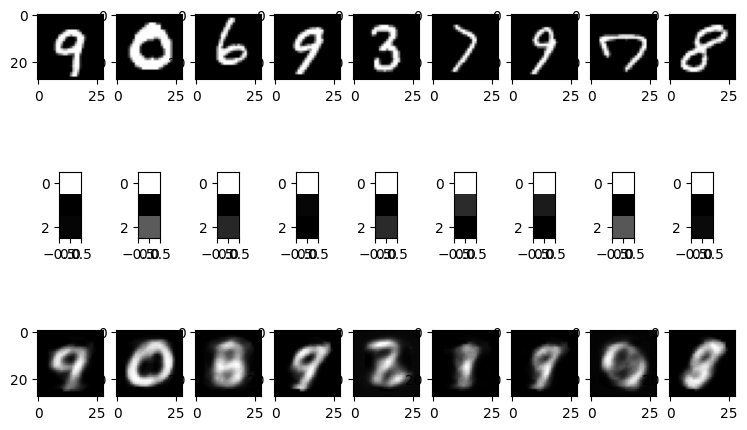

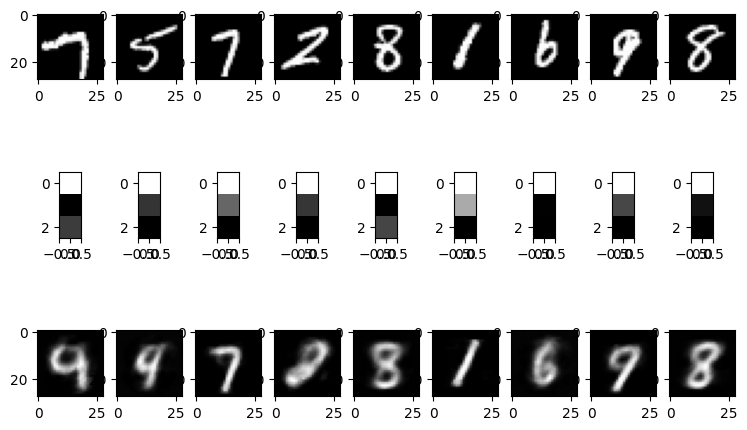

In [ ]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,6))
  plt.gray()
  imgs = ouputs[k][1].detach().numpy()
  encon = ouputs[k][2].detach().numpy()
  recon = ouputs[k][3].detach().numpy()
  for i,item in enumerate(imgs):
    if i>=9:break
    plt.subplot(6,9,i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

  for i,item in enumerate(encon):
    if i>=9:break
    plt.subplot(6,9,i+1+18)
    item = item.reshape(-1,3,1)
    plt.imshow(item[0])

  for i,item in enumerate(recon):
    if i>=9:break
    plt.subplot(6,9,36+i+1)
    item = item.reshape(-1,28,28)
    plt.imshow(item[0])

